In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils

### Load Data

In [2]:
x_points= np.linspace(0,20)
y_points= -2*x_points + 1

In [3]:
RegData = np.loadtxt('Datasets/RegData.csv',delimiter = ',')
x_points2 = RegData[:,0] 
y_points2 = RegData[:,1]

### Data Plotting Methods

In [4]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [6]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

### Data Plotting

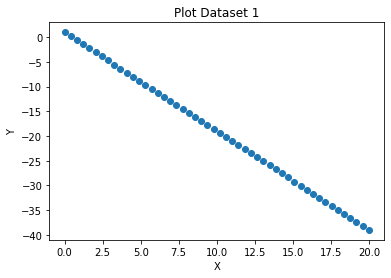

In [7]:
drawScatter(x_points,y_points,"X","Y","Plot Dataset 1")

## Momentum based Gradient

In [8]:
def momentumGD (x,y,epochs,alpha,gamma,threshold):
    thetas=np.array([0,0])
    v = np.array([0,0])
    thetaList , costs,hs, vs  = np.empty((1,2)),[],[],[]
    grads = []
    X = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost =  np.sum(np.dot(e,e))/(len(y)*2)
        if(len(costs)>0 and abs(costs[-1]-cost)<threshold):
            break
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/len(y)
        v = gamma * v + alpha *grads
        thetas = thetas - v
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs

In [9]:
thetas , costs , h = momentumGD (x_points,y_points,200,0.001,0.9,0.001)
print(len(costs))

88


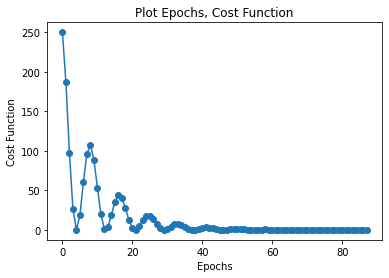

In [10]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

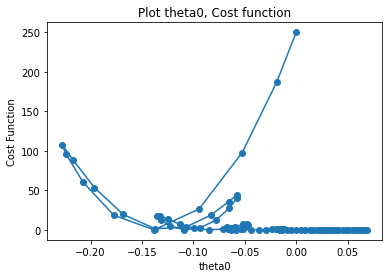

In [11]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

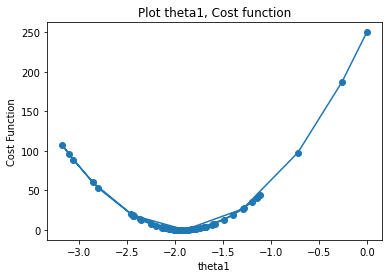

In [12]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

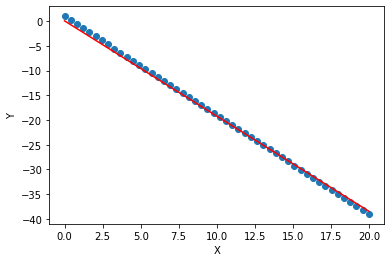

In [13]:
drawRegressionLine(x_points,y_points,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [14]:
print("r2 =",r2_score(y_points, h[-1]))
print("cost =",costs[-1])

r2 = 0.9983751943991768
cost = 0.11274161311835026


## Nestrov Accelerated Gradient (NAG)

In [15]:
def NAG (x,y,epochs,alpha,gamma,threshold):
    thetas=np.array([0,0])
    v=np.array([0,0])
    thetaList , costs,hs, vs  = np.empty((1,2)),[],[],[np.array([0,0])]
    grads = []
    X = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost = np.sum(np.dot(e,e))/(len(y)*2)
        if(len(costs)>0 and abs(costs[-1]-cost)<threshold):
            break
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        temp = thetas - gamma * vs[-1]
        htemp = np.dot(temp,X.T)
        etemp = htemp - y
        grads =  np.dot(X.T,etemp)/len(y)
        thetas = temp - alpha * grads
        v = gamma * vs[-1] + alpha *grads
        vs.append(v)
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs

In [16]:
thetas , costs , h = NAG (x_points,y_points,200,0.001,0.9,0.001)
print(len(costs))

39


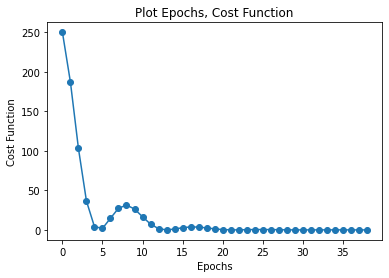

In [17]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

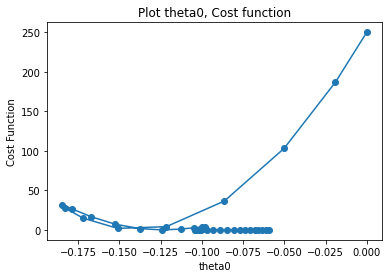

In [18]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

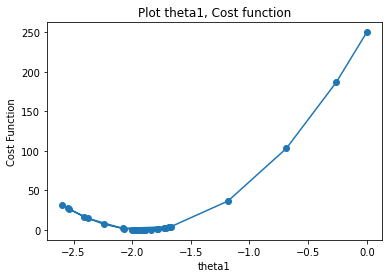

In [19]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

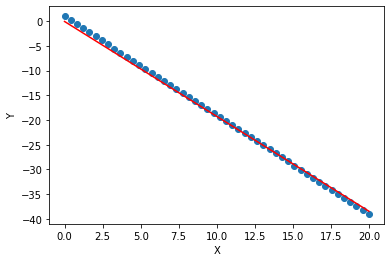

In [20]:
drawRegressionLine(x_points,y_points,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [21]:
print("r2 =",r2_score(y_points, h[-1]))
print("cost =",costs[-1])

r2 = 0.9979157361502728
cost = 0.14462238957290607
